# Island Economic Analysis

Comprehensive analysis of 100 years of island data with predictions for the next 5 years.

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Load the integrated dataset
df = pd.read_csv('integrated_population_data_year100.csv')

print("Dataset loaded successfully!")
print("="*80)
print(f"Total records: {len(df):,}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head(10))
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

Dataset loaded successfully!
Total records: 50,994
Columns: ['year', 'sex', 'profession', 'income', 'net_worth', 'age', 'happiness']

First few rows:
   year sex     profession   income  net_worth  age  happiness
0     0   F  civil servant  5131.08    10000.0   40      100.0
1     0   M          child     0.00    10000.0    1      100.0
2     0   M     unemployed   124.10    10000.0   25      100.0
3     0   M         farmer  1868.39    10000.0   36      100.0
4     0   F          child     0.00    10000.0    1      100.0
5     0   F  civil servant  5045.29    10000.0   41      100.0
6     0   F          child     0.00    10000.0    8      100.0
7     0   M      homemaker   149.64    10000.0   30      100.0
8     0   M          child     0.00    10000.0    3      100.0
9     0   M         fisher  1381.20    10000.0   24      100.0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50994 entries, 0 to 50993
Data columns (total 7 columns):
 #   Column      Non-Null Count  D

## 1. Key Statistics & Insights

In [57]:
# Calculate GDP data from population
yearly_stats = df.groupby('year').agg({
    'income': ['mean', 'sum', 'median'],
    'net_worth': ['mean', 'sum'],
    'age': ['mean', 'median'],
    'happiness': 'mean',
    'year': 'count'
}).reset_index()

yearly_stats.columns = ['year', 'avg_income', 'total_income', 'median_income', 
                        'avg_networth', 'total_networth', 'avg_age', 'median_age', 
                        'avg_happiness', 'population']

# Calculate GDP (using total income as proxy for GDP)
yearly_stats['gdp'] = yearly_stats['total_income']

print("="*80)
print("ISLAND ECONOMIC OVERVIEW (100 Years)")
print("="*80)
print(f"\n📊 Population Statistics:")
print(f"   Average population per year: {yearly_stats['population'].mean():.0f}")
print(f"   Population range: {yearly_stats['population'].min():.0f} - {yearly_stats['population'].max():.0f}")

print(f"\n💰 Income Statistics:")
print(f"   Overall average income: ${df['income'].mean():,.2f}")
print(f"   Highest individual income: ${df['income'].max():,.2f}")
print(f"   Average yearly total income: ${yearly_stats['total_income'].mean():,.2f}")

print(f"\n🏦 Net Worth Statistics:")
print(f"   Average net worth: ${df['net_worth'].mean():,.2f}")
print(f"   Highest net worth: ${df['net_worth'].max():,.2f}")
print(f"   Lowest net worth: ${df['net_worth'].min():,.2f}")

print(f"\n👥 Demographics:")
print(f"   Average age: {df['age'].mean():.1f} years")
print(f"   Age range: {df['age'].min():.0f} - {df['age'].max():.0f} years")

print(f"\n😊 Happiness:")
print(f"   Average happiness: {df['happiness'].mean():.2f}")
print(f"   Happiness range: {df['happiness'].min():.2f} - {df['happiness'].max():.2f}")


ISLAND ECONOMIC OVERVIEW (100 Years)

📊 Population Statistics:
   Average population per year: 505
   Population range: 496 - 515

💰 Income Statistics:
   Overall average income: $2,121.05
   Highest individual income: $12,543.60
   Average yearly total income: $1,070,901.60

🏦 Net Worth Statistics:
   Average net worth: $24,298.59
   Highest net worth: $176,445.87
   Lowest net worth: $-52,795.51

👥 Demographics:
   Average age: 36.2 years
   Age range: 0 - 82 years

😊 Happiness:
   Average happiness: 100.09
   Happiness range: 65.00 - 122.61


In [58]:

print(f"\n📈 GDP Statistics:")
print(f"   Average GDP: ${yearly_stats['gdp'].mean():,.2f}")
print(f"   GDP growth over 100 years: {(yearly_stats['gdp'].iloc[-1] / yearly_stats['gdp'].iloc[0] - 1) * 100:.1f}%")
print(f"   Year 0 GDP: ${yearly_stats['gdp'].iloc[0]:,.2f}")
print(f"   Year 99 GDP: ${yearly_stats['gdp'].iloc[-1]:,.2f}")


📈 GDP Statistics:
   Average GDP: $1,070,901.60
   GDP growth over 100 years: 27.2%
   Year 0 GDP: $947,610.99
   Year 99 GDP: $1,205,293.20


## 2. Highest Income Professions Analysis

In [64]:
# Analyze professions (excluding children)
working_pop = df[df['profession'] != 'child'].copy()

# Overall profession statistics (across all 100 years)
profession_stats = working_pop.groupby('profession').agg({
    'income': ['mean', 'median', 'max', 'min', 'count'],
    'net_worth': 'mean',
    'age': 'mean',
    'happiness': 'mean'
}).reset_index()

profession_stats.columns = ['profession', 'avg_income', 'median_income', 'max_income', 
                            'min_income', 'count', 'avg_networth', 'avg_age', 'avg_happiness']
profession_stats = profession_stats.sort_values('avg_income', ascending=False)

print("="*80)
print("TOP 10 PROFESSIONS BY AVERAGE INCOME (100-Year Average)")
print("="*80)
print(profession_stats[['profession', 'avg_income', 'median_income', 'count']].head(10).to_string(index=False))

# Analyze by year: income contribution per year
yearly_profession = working_pop.groupby(['year', 'profession']).agg({
    'income': ['mean', 'count', 'sum']
}).reset_index()
yearly_profession.columns = ['year', 'profession', 'avg_income', 'worker_count', 'total_income']

# For each year, find top professions by total income contribution
print("\n" + "="*80)
print("TOP PROFESSIONS BY INCOME CONTRIBUTION PER YEAR")
print("="*80)
print("Showing sample years: 0, 25, 50, 75, 99")
print("-"*80)

for sample_year in [0, 25, 50, 75, 99]:
    year_data = yearly_profession[yearly_profession['year'] == sample_year].sort_values('total_income', ascending=False)
    print(f"\nYear {sample_year} (GDP: ${yearly_stats[yearly_stats['year']==sample_year]['gdp'].values[0]:,.2f}):")
    print(f"{'Profession':<20} {'Avg Income':<15} {'Workers':<10} {'Total Income':<20}")
    print("-"*80)
    for idx, row in year_data.head(5).iterrows():
        print(f"{row['profession']:<20} ${row['avg_income']:>12,.2f}  {row['worker_count']:>7.0f}  ${row['total_income']:>16,.2f}")
    
    # Verify GDP calculation
    year_total = year_data['total_income'].sum()
    print(f"{'TOTAL (all professions)':<20} {'':<15} {year_data['worker_count'].sum():>7.0f}  ${year_total:>16,.2f}")

# Calculate average yearly contribution by profession
avg_yearly_contribution = yearly_profession.groupby('profession').agg({
    'total_income': 'mean',
    'worker_count': 'mean',
    'avg_income': 'mean'
}).reset_index()
avg_yearly_contribution.columns = ['profession', 'avg_yearly_contribution', 'avg_workers_per_year', 'avg_income']
avg_yearly_contribution = avg_yearly_contribution.sort_values('avg_yearly_contribution', ascending=False)

print("\n" + "="*80)
print("TOP 10 PROFESSIONS BY AVERAGE YEARLY INCOME CONTRIBUTION")
print("="*80)
print(avg_yearly_contribution[['profession', 'avg_income', 'avg_workers_per_year', 'avg_yearly_contribution']].head(10).to_string(index=False))




TOP 10 PROFESSIONS BY AVERAGE INCOME (100-Year Average)
      profession  avg_income  median_income  count
   civil servant 6182.446960       6012.330   3313
service provider 6062.442177       5833.130   3867
       craftsman 4800.816679       4580.475   5152
          fisher 3136.927572       2848.625   6264
          farmer 1840.492776       1771.340   6722
         retired 1606.043514       1271.650   4847
      unemployed   12.342250         63.410   2493
       homemaker  -53.608001         25.770   6257

TOP PROFESSIONS BY INCOME CONTRIBUTION PER YEAR
Showing sample years: 0, 25, 50, 75, 99
--------------------------------------------------------------------------------

Year 0 (GDP: $947,610.99):
Profession           Avg Income      Workers    Total Income        
--------------------------------------------------------------------------------
civil servant        $    5,357.96       43  $      230,392.30
service provider     $    5,215.76       41  $      213,846.07
craftsman  

In [65]:
print("\n" + "="*80)
print("HIGHEST EARNING INDIVIDUAL")
print("="*80)
highest_earner = working_pop.loc[working_pop['income'].idxmax()]
print(f"Profession: {highest_earner['profession']}")
print(f"Income: ${highest_earner['income']:,.2f}")
print(f"Net Worth: ${highest_earner['net_worth']:,.2f}")
print(f"Age: {highest_earner['age']:.0f} years")
print(f"Year: {highest_earner['year']}")
print(f"Sex: {highest_earner['sex']}")
print(f"Happiness: {highest_earner['happiness']:.2f}")

print("\n" + "="*80)
print("PROFESSION COMPARISON - Full Statistics")
print("="*80)
print(avg_yearly_contribution[['profession', 'avg_income', 'avg_workers_per_year', 'avg_yearly_contribution']].head(10).to_string(index=False))


HIGHEST EARNING INDIVIDUAL
Profession: service provider
Income: $12,543.60
Net Worth: $136,315.90
Age: 69 years
Year: 37
Sex: F
Happiness: 102.99

PROFESSION COMPARISON - Full Statistics
      profession  avg_income  avg_workers_per_year  avg_yearly_contribution
       craftsman 4794.816439             51.009901            244889.183465
service provider 6057.800880             38.287129            232113.503960
   civil servant 6194.372679             32.801980            202796.502772
          fisher 3122.251893             62.019802            194551.626832
          farmer 1838.298031             66.554455            122492.994455
         retired 1632.594033             48.470000             77844.929100
      unemployed   -8.765745             24.683168               304.645842
       homemaker  -59.990987             61.950495             -3321.042178


In [69]:
# Analysis of last 10 years (Year 91-100)
print("\n" + "="*80)
print("LAST 10 YEARS ANALYSIS (Year 91-100)")
print("="*80)

# Filter data for years 91-100
last_10_years = yearly_profession[yearly_profession['year'].between(91, 100)]

# Group by profession for these years
last_10_prof_stats = last_10_years.groupby('profession').agg({
    'avg_income': 'mean',
    'worker_count': 'mean',
    'total_income': 'mean'
}).reset_index()
last_10_prof_stats.columns = ['profession', 'avg_income', 'avg_workers', 'avg_contribution']

# Sort by average income
last_10_by_income = last_10_prof_stats.sort_values('avg_income', ascending=False)
print("\nTop 5 Professions by Average Income (Year 91-100):")
print(f"{'Profession':<20} {'Avg Income':<15} {'Avg Workers':<15}")
print("-"*80)
for idx, row in last_10_by_income.head(5).iterrows():
    print(f"{row['profession']:<20} ${row['avg_income']:>12,.2f}  {row['avg_workers']:>12.1f}")

# Sort by income contribution (avg_income × avg_workers)
last_10_by_contribution = last_10_prof_stats.sort_values('avg_contribution', ascending=False)
print("\nTop 5 Professions by Income Contribution (Year 91-100):")
print(f"{'Profession':<20} {'Avg Income':<15} {'Avg Workers':<15} {'Contribution':<20}")
print("-"*80)
for idx, row in last_10_by_contribution.head(5).iterrows():
    print(f"{row['profession']:<20} ${row['avg_income']:>12,.2f}  {row['avg_workers']:>12.1f}  ${row['avg_contribution']:>16,.2f}")



LAST 10 YEARS ANALYSIS (Year 91-100)

Top 5 Professions by Average Income (Year 91-100):
Profession           Avg Income      Avg Workers    
--------------------------------------------------------------------------------
civil servant        $    6,660.48          27.4
service provider     $    6,568.27          34.8
craftsman            $    5,525.78          49.1
fisher               $    3,501.42          74.0
farmer               $    2,093.88          68.9

Top 5 Professions by Income Contribution (Year 91-100):
Profession           Avg Income      Avg Workers     Contribution        
--------------------------------------------------------------------------------
craftsman            $    5,525.78          49.1  $      270,990.34
fisher               $    3,501.42          74.0  $      258,530.46
service provider     $    6,568.27          34.8  $      228,330.62
civil servant        $    6,660.48          27.4  $      182,974.29
farmer               $    2,093.88          68.

In [71]:
# Year-by-year breakdown for Craftsman (Year 91-100)
print("="*80)
print("CRAFTSMAN - YEAR-BY-YEAR BREAKDOWN (Year 91-100)")
print("="*80)
craftsman_years = last_10_years[last_10_years['profession'] == 'craftsman'].sort_values('year')
print(f"{'Year':<8} {'Avg Income':<15} {'Workers':<10} {'Total Contribution':<20}")
print("-"*80)
for idx, row in craftsman_years.iterrows():
    print(f"{int(row['year']):<8} ${row['avg_income']:>12,.2f}  {row['worker_count']:>7.0f}  ${row['total_income']:>16,.2f}")
print("-"*80)
print(f"{'AVERAGE':<8} ${craftsman_years['avg_income'].mean():>12,.2f}  {craftsman_years['worker_count'].mean():>7.1f}  ${craftsman_years['total_income'].mean():>16,.2f}")

CRAFTSMAN - YEAR-BY-YEAR BREAKDOWN (Year 91-100)
Year     Avg Income      Workers    Total Contribution  
--------------------------------------------------------------------------------
91       $    5,371.74       52  $      279,330.35
92       $    5,461.18       51  $      278,520.25
93       $    5,272.07       51  $      268,875.75
94       $    5,385.80       50  $      269,290.22
95       $    5,425.16       51  $      276,683.10
96       $    5,526.89       50  $      276,344.52
97       $    5,628.78       49  $      275,810.35
98       $    5,748.32       48  $      275,919.19
99       $    5,766.68       46  $      265,267.24
100      $    5,671.22       43  $      243,862.47
--------------------------------------------------------------------------------
AVERAGE  $    5,525.78     49.1  $      270,990.34


In [72]:
# Year-by-year breakdown for Fisher (Year 91-100)
print("="*80)
print("FISHER - YEAR-BY-YEAR BREAKDOWN (Year 91-100)")
print("="*80)
fisher_years = last_10_years[last_10_years['profession'] == 'fisher'].sort_values('year')
print(f"{'Year':<8} {'Avg Income':<15} {'Workers':<10} {'Total Contribution':<20}")
print("-"*80)
for idx, row in fisher_years.iterrows():
    print(f"{int(row['year']):<8} ${row['avg_income']:>12,.2f}  {row['worker_count']:>7.0f}  ${row['total_income']:>16,.2f}")
print("-"*80)
print(f"{'AVERAGE':<8} ${fisher_years['avg_income'].mean():>12,.2f}  {fisher_years['worker_count'].mean():>7.1f}  ${fisher_years['total_income'].mean():>16,.2f}")

FISHER - YEAR-BY-YEAR BREAKDOWN (Year 91-100)
Year     Avg Income      Workers    Total Contribution  
--------------------------------------------------------------------------------
91       $    4,583.16       74  $      339,154.19
92       $    2,677.71       77  $      206,183.42
93       $    2,687.62       77  $      206,946.95
94       $    4,629.16       78  $      361,074.21
95       $    2,780.97       77  $      214,134.94
96       $    2,797.54       76  $      212,613.25
97       $    4,740.48       74  $      350,795.71
98       $    2,764.10       72  $      199,015.44
99       $    2,706.51       68  $      184,042.98
100      $    4,646.92       67  $      311,343.48
--------------------------------------------------------------------------------
AVERAGE  $    3,501.42     74.0  $      258,530.46


In [73]:
# Year-by-year breakdown for Service Provider (Year 91-100)
print("="*80)
print("SERVICE PROVIDER - YEAR-BY-YEAR BREAKDOWN (Year 91-100)")
print("="*80)
service_years = last_10_years[last_10_years['profession'] == 'service provider'].sort_values('year')
print(f"{'Year':<8} {'Avg Income':<15} {'Workers':<10} {'Total Contribution':<20}")
print("-"*80)
for idx, row in service_years.iterrows():
    print(f"{int(row['year']):<8} ${row['avg_income']:>12,.2f}  {row['worker_count']:>7.0f}  ${row['total_income']:>16,.2f}")
print("-"*80)
print(f"{'AVERAGE':<8} ${service_years['avg_income'].mean():>12,.2f}  {service_years['worker_count'].mean():>7.1f}  ${service_years['total_income'].mean():>16,.2f}")

SERVICE PROVIDER - YEAR-BY-YEAR BREAKDOWN (Year 91-100)
Year     Avg Income      Workers    Total Contribution  
--------------------------------------------------------------------------------
91       $    6,395.03       38  $      243,011.22
92       $    6,371.08       37  $      235,729.96
93       $    6,257.95       35  $      219,028.33
94       $    6,469.46       35  $      226,431.14
95       $    6,401.54       35  $      224,054.06
96       $    6,590.77       35  $      230,677.10
97       $    6,691.37       34  $      227,506.55
98       $    6,882.41       34  $      234,001.90
99       $    6,926.82       33  $      228,585.17
100      $    6,696.28       32  $      214,280.82
--------------------------------------------------------------------------------
AVERAGE  $    6,568.27     34.8  $      228,330.62


In [75]:
# Age analysis for last 10 years (Year 91-100)
print("="*80)
print("AGE ANALYSIS - LAST 10 YEARS (Year 91-100)")
print("="*80)

# Filter working population for years 91-100
last_10_working = working_pop[working_pop['year'].between(91, 100)]

# Calculate age statistics by profession
age_by_profession = last_10_working.groupby('profession').agg({
    'age': ['mean', 'median', 'min', 'max', 'count']
}).reset_index()
age_by_profession.columns = ['profession', 'avg_age', 'median_age', 'min_age', 'max_age', 'count']

# Sort by average age
age_by_avg = age_by_profession.sort_values('avg_age', ascending=False)
print("\nTop 5 Professions by Average Age (Year 91-100):")
print(f"{'Profession':<20} {'Avg Age':<12} {'Median Age':<12} {'Workers':<10}")
print("-"*80)
for idx, row in age_by_avg.head(5).iterrows():
    print(f"{row['profession']:<20} {row['avg_age']:>10.1f}  {row['median_age']:>10.1f}  {row['count']:>8.0f}")

# Sort by median age
age_by_median = age_by_profession.sort_values('median_age', ascending=False)
print("\nTop 5 Professions by Median Age (Year 91-100):")
print(f"{'Profession':<20} {'Median Age':<12} {'Avg Age':<12} {'Workers':<10}")
print("-"*80)
for idx, row in age_by_median.head(5).iterrows():
    print(f"{row['profession']:<20} {row['median_age']:>10.1f}  {row['avg_age']:>10.1f}  {row['count']:>8.0f}")

AGE ANALYSIS - LAST 10 YEARS (Year 91-100)

Top 5 Professions by Average Age (Year 91-100):
Profession           Avg Age      Median Age   Workers   
--------------------------------------------------------------------------------
retired                    68.6        68.0       569
craftsman                  44.8        47.0       491
homemaker                  44.8        47.0       554
farmer                     44.2        45.0       689
fisher                     44.2        47.0       740

Top 5 Professions by Median Age (Year 91-100):
Profession           Median Age   Avg Age      Workers   
--------------------------------------------------------------------------------
retired                    68.0        68.6       569
craftsman                  47.0        44.8       491
fisher                     47.0        44.2       740
homemaker                  47.0        44.8       554
farmer                     45.0        44.2       689


In [77]:
# Fisher age analysis - Year by year (91-100)
print("="*80)
print("FISHER - AGE ANALYSIS YEAR-BY-YEAR (Year 91-100)")
print("="*80)

# Calculate age statistics for fisher by year
fisher_age_yearly = last_10_working[last_10_working['profession'] == 'fisher'].groupby('year').agg({
    'age': ['mean', 'median', 'min', 'max', 'count']
}).reset_index()
fisher_age_yearly.columns = ['year', 'avg_age', 'median_age', 'min_age', 'max_age', 'worker_count']

print(f"{'Year':<8} {'Avg Age':<12} {'Median Age':<12} {'Min Age':<10} {'Max Age':<10} {'Workers':<10}")
print("-"*80)
for idx, row in fisher_age_yearly.iterrows():
    print(f"{int(row['year']):<8} {row['avg_age']:>10.1f}  {row['median_age']:>10.1f}  {row['min_age']:>8.0f}  {row['max_age']:>8.0f}  {row['worker_count']:>8.0f}")
print("-"*80)
print(f"{'AVERAGE':<8} {fisher_age_yearly['avg_age'].mean():>10.1f}  {fisher_age_yearly['median_age'].mean():>10.1f}  {fisher_age_yearly['min_age'].mean():>8.1f}  {fisher_age_yearly['max_age'].mean():>8.1f}  {fisher_age_yearly['worker_count'].mean():>8.1f}")

print(f"\n📊 Fisher Age Summary (Year 91-100):")
print(f"   Average age trend: {fisher_age_yearly['avg_age'].iloc[0]:.1f} → {fisher_age_yearly['avg_age'].iloc[-1]:.1f}")
print(f"   Median age trend: {fisher_age_yearly['median_age'].iloc[0]:.1f} → {fisher_age_yearly['median_age'].iloc[-1]:.1f}")
print(f"   Age range: {fisher_age_yearly['min_age'].min():.0f} - {fisher_age_yearly['max_age'].max():.0f} years")

FISHER - AGE ANALYSIS YEAR-BY-YEAR (Year 91-100)
Year     Avg Age      Median Age   Min Age    Max Age    Workers   
--------------------------------------------------------------------------------
91             43.2        46.0        18        63        74
92             43.2        45.0        18        64        77
93             43.5        46.0        18        64        77
94             43.7        46.5        18        64        78
95             44.4        47.0        19        64        77
96             45.2        47.5        20        64        76
97             45.0        47.5        18        64        74
98             44.9        48.0        18        64        72
99             44.0        45.5        18        64        68
100            44.7        46.0        19        64        67
--------------------------------------------------------------------------------
AVERAGE        44.2        46.5      18.4      63.9      74.0

📊 Fisher Age Summary (Year 91-100):
  

In [80]:
# Craftsman age analysis - Year by year (91-100)
print("="*80)
print("CRAFTSMAN - AGE ANALYSIS YEAR-BY-YEAR (Year 91-100)")
print("="*80)

# Calculate age statistics for craftsman by year
craftsman_age_yearly = last_10_working[last_10_working['profession'] == 'craftsman'].groupby('year').agg({
    'age': ['mean', 'median', 'min', 'max', 'count']
}).reset_index()
craftsman_age_yearly.columns = ['year', 'avg_age', 'median_age', 'min_age', 'max_age', 'worker_count']

print(f"{'Year':<8} {'Avg Age':<12} {'Median Age':<12} {'Min Age':<10} {'Max Age':<10} {'Workers':<10}")
print("-"*80)
for idx, row in craftsman_age_yearly.iterrows():
    print(f"{int(row['year']):<8} {row['avg_age']:>10.1f}  {row['median_age']:>10.1f}  {row['min_age']:>8.0f}  {row['max_age']:>8.0f}  {row['worker_count']:>8.0f}")
print("-"*80)
print(f"{'AVERAGE':<8} {craftsman_age_yearly['avg_age'].mean():>10.1f}  {craftsman_age_yearly['median_age'].mean():>10.1f}  {craftsman_age_yearly['min_age'].mean():>8.1f}  {craftsman_age_yearly['max_age'].mean():>8.1f}  {craftsman_age_yearly['worker_count'].mean():>8.1f}")

print(f"\n📊 Craftsman Age Summary (Year 91-100):")
print(f"   Average age trend: {craftsman_age_yearly['avg_age'].iloc[0]:.1f} → {craftsman_age_yearly['avg_age'].iloc[-1]:.1f}")
print(f"   Median age trend: {craftsman_age_yearly['median_age'].iloc[0]:.1f} → {craftsman_age_yearly['median_age'].iloc[-1]:.1f}")
print(f"   Age range: {craftsman_age_yearly['min_age'].min():.0f} - {craftsman_age_yearly['max_age'].max():.0f} years")

CRAFTSMAN - AGE ANALYSIS YEAR-BY-YEAR (Year 91-100)
Year     Avg Age      Median Age   Min Age    Max Age    Workers   
--------------------------------------------------------------------------------
91             43.8        47.5        18        64        52
92             44.4        48.0        19        64        51
93             43.3        47.0        18        64        51
94             43.9        46.5        19        63        50
95             44.4        46.0        18        64        51
96             45.0        47.0        19        64        50
97             45.6        48.0        20        64        49
98             46.2        48.0        21        64        48
99             46.4        47.0        22        64        46
100            46.2        45.0        23        64        43
--------------------------------------------------------------------------------
AVERAGE        44.9        47.0      19.7      63.9      49.1

📊 Craftsman Age Summary (Year 91-10

In [85]:
# Year 100 - Individual ages for Craftsman and Fisher
print("="*80)
print("YEAR 100 - ALL INDIVIDUAL AGES")
print("="*80)

# Filter for year 100
year_100_data = working_pop[working_pop['year'] == 100].copy()

# Craftsman ages
craftsman_100 = year_100_data[year_100_data['profession'] == 'craftsman'].sort_values('age', ascending=False)
print(f"\nCRAFTSMAN (Total: {len(craftsman_100)} workers)")
print("-"*80)
print(f"{'Index':<8} {'Age':<8} {'Income':<15} {'Net Worth':<15} {'Sex':<6} {'Happiness':<12}")
print("-"*80)
for idx, (_, row) in enumerate(craftsman_100.iterrows(), 1):
    print(f"{idx:<8} {row['age']:<8.0f} ${row['income']:>12,.2f}  ${row['net_worth']:>12,.2f}  {row['sex']:<6} {row['happiness']:>10.2f}")


YEAR 100 - ALL INDIVIDUAL AGES

CRAFTSMAN (Total: 43 workers)
--------------------------------------------------------------------------------
Index    Age      Income          Net Worth       Sex    Happiness   
--------------------------------------------------------------------------------
1        64       $    8,774.84  $  105,996.23  F          102.66
2        64       $    8,610.69  $  108,803.68  M          102.63
3        63       $    8,895.52  $  105,711.88  F          102.66
4        63       $    8,603.93  $  105,308.58  M          102.61
5        62       $    8,215.89  $  100,515.25  M          102.55
6        62       $    7,750.77  $   81,264.40  F          102.45
7        62       $    8,352.71  $   81,696.23  M          102.51
8        62       $    8,431.53  $  102,767.10  F          102.60
9        61       $    8,013.76  $   97,874.14  M          102.52
10       61       $    5,528.41  $    3,928.87  F          101.80
11       59       $    7,565.04  $   88,535.22

In [84]:
# Fisher ages in Year 100
fisher_100 = year_100_data[year_100_data['profession'] == 'fisher'].sort_values('age', ascending=False)
print("\n" + "="*80)
print(f"FISHER (Total: {len(fisher_100)} workers)")
print("-"*80)
print(f"{'Index':<8} {'Age':<8} {'Income':<15} {'Net Worth':<15} {'Sex':<6} {'Happiness':<12}")
print("-"*80)
for idx, (_, row) in enumerate(fisher_100.iterrows(), 1):
    print(f"{idx:<8} {row['age']:<8.0f} ${row['income']:>12,.2f}  ${row['net_worth']:>12,.2f}  {row['sex']:<6} {row['happiness']:>10.2f}")




FISHER (Total: 67 workers)
--------------------------------------------------------------------------------
Index    Age      Income          Net Worth       Sex    Happiness   
--------------------------------------------------------------------------------
1        64       $    7,266.50  $   70,126.36  F          102.00
2        64       $    7,586.66  $   70,175.07  F          102.02
3        63       $    6,719.92  $   67,219.69  M          101.88
4        63       $    7,400.07  $   67,451.20  M          101.98
5        62       $    7,006.77  $   65,056.92  F          101.93
6        62       $    6,873.05  $   63,883.45  X          101.90
7        61       $    6,840.58  $   61,973.01  M          101.84
8        61       $    6,379.45  $   61,673.78  F          101.79
9        61       $    6,541.58  $   62,672.05  F          101.81
10       61       $    6,933.79  $   62,552.20  F          101.86
11       60       $    6,722.62  $   60,323.87  F          101.79
12       60   

## 3. Individual Tracking & Happiness-Income Analysis

In [96]:
# Analyze age progression patterns in Craftsman & Fisher
print("="*80)
print("AGE PROGRESSION & HAPPINESS-INCOME ANALYSIS")
print("="*80)

# Filter for craftsman and fisher
craftsman_data = working_pop[working_pop['profession'] == 'craftsman'].copy()
fisher_data = working_pop[working_pop['profession'] == 'fisher'].copy()

# Group by year and age to see progression patterns
print("\n📊 Age Distribution by Year (Sample years):")
print("\nCRAFTSMAN - Age counts per year:")
for year in [0, 20, 40, 60, 80, 99]:
    year_data = craftsman_data[craftsman_data['year'] == year]
    print(f"  Year {year}: {len(year_data)} workers, ages {year_data['age'].min():.0f}-{year_data['age'].max():.0f}, avg={year_data['age'].mean():.1f}")

print("\nFISHER - Age counts per year:")
for year in [0, 20, 40, 60, 80, 99]:
    year_data = fisher_data[fisher_data['year'] == year]
    print(f"  Year {year}: {len(year_data)} workers, ages {year_data['age'].min():.0f}-{year_data['age'].max():.0f}, avg={year_data['age'].mean():.1f}")



AGE PROGRESSION & HAPPINESS-INCOME ANALYSIS

📊 Age Distribution by Year (Sample years):

CRAFTSMAN - Age counts per year:
  Year 0: 48 workers, ages 18-64, avg=42.0
  Year 20: 55 workers, ages 19-64, avg=43.5
  Year 40: 48 workers, ages 19-64, avg=41.3
  Year 60: 48 workers, ages 18-59, avg=36.7
  Year 80: 56 workers, ages 19-64, avg=43.2
  Year 99: 46 workers, ages 22-64, avg=46.4

FISHER - Age counts per year:
  Year 0: 53 workers, ages 18-64, avg=42.0
  Year 20: 53 workers, ages 18-64, avg=40.7
  Year 40: 51 workers, ages 18-64, avg=42.1
  Year 60: 58 workers, ages 18-58, avg=32.9
  Year 80: 82 workers, ages 18-64, avg=43.3
  Year 99: 68 workers, ages 18-64, avg=44.0


In [95]:
# Look for growing individuals (simplified approach)
print("\n" + "="*80)
print("ANALYZING CONTINUOUS AGE GROUPS (18-30 year olds growing up)")
print("="*80)

# Track young workers (18-30) over 20 year period
young_craftsman_early = craftsman_data[(craftsman_data['year'].between(0, 20)) & 
                                        (craftsman_data['age'].between(18, 30))]
young_craftsman_mid = craftsman_data[(craftsman_data['year'].between(40, 60)) & 
                                      (craftsman_data['age'].between(38, 50))]
young_craftsman_late = craftsman_data[(craftsman_data['year'].between(80, 99)) & 
                                       (craftsman_data['age'].between(58, 69))]

print(f"\nCRAFTSMAN age cohort tracking:")
print(f"  Years 0-20 (age 18-30):   {len(young_craftsman_early)} records")
print(f"  Years 40-60 (age 38-50):  {len(young_craftsman_mid)} records")
print(f"  Years 80-99 (age 58-69):  {len(young_craftsman_late)} records")

young_fisher_early = fisher_data[(fisher_data['year'].between(0, 20)) & 
                                  (fisher_data['age'].between(18, 30))]
young_fisher_mid = fisher_data[(fisher_data['year'].between(40, 60)) & 
                                (fisher_data['age'].between(38, 50))]
young_fisher_late = fisher_data[(fisher_data['year'].between(80, 99)) & 
                                 (fisher_data['age'].between(58, 69))]

print(f"\nFISHER age cohort tracking:")
print(f"  Years 0-20 (age 18-30):   {len(young_fisher_early)} records")
print(f"  Years 40-60 (age 38-50):  {len(young_fisher_mid)} records")
print(f"  Years 80-99 (age 58-69):  {len(young_fisher_late)} records")


ANALYZING CONTINUOUS AGE GROUPS (18-30 year olds growing up)

CRAFTSMAN age cohort tracking:
  Years 0-20 (age 18-30):   270 records
  Years 40-60 (age 38-50):  273 records
  Years 80-99 (age 58-69):  198 records

FISHER age cohort tracking:
  Years 0-20 (age 18-30):   283 records
  Years 40-60 (age 38-50):  245 records
  Years 80-99 (age 58-69):  282 records


In [91]:
# Happiness-Income correlation by age groups
print("\n" + "="*80)
print("HAPPINESS ↔ INCOME CORRELATION BY AGE GROUPS")
print("="*80)

# Define age groups
age_groups = [(18, 30), (31, 45), (46, 60), (61, 69)]

print("\n🔧 CRAFTSMAN:")
for age_min, age_max in age_groups:
    age_group_data = craftsman_data[craftsman_data['age'].between(age_min, age_max)]
    if len(age_group_data) > 0:
        corr = age_group_data['happiness'].corr(age_group_data['income'])
        print(f"  Age {age_min}-{age_max}: Happiness↔Income = {corr:>7.4f} ({len(age_group_data)} records)")
        print(f"              Avg Income: ${age_group_data['income'].mean():>10,.2f}, Avg Happiness: {age_group_data['happiness'].mean():>6.2f}")

print("\n🎣 FISHER:")
for age_min, age_max in age_groups:
    age_group_data = fisher_data[fisher_data['age'].between(age_min, age_max)]
    if len(age_group_data) > 0:
        corr = age_group_data['happiness'].corr(age_group_data['income'])
        print(f"  Age {age_min}-{age_max}: Happiness↔Income = {corr:>7.4f} ({len(age_group_data)} records)")
        print(f"              Avg Income: ${age_group_data['income'].mean():>10,.2f}, Avg Happiness: {age_group_data['happiness'].mean():>6.2f}")


HAPPINESS ↔ INCOME CORRELATION BY AGE GROUPS

🔧 CRAFTSMAN:
  Age 18-30: Happiness↔Income =  0.2493 (1283 records)
              Avg Income: $  2,598.32, Avg Happiness:  99.06
  Age 31-45: Happiness↔Income =  0.2795 (1640 records)
              Avg Income: $  4,135.24, Avg Happiness:  99.97
  Age 46-60: Happiness↔Income =  0.2457 (1762 records)
              Avg Income: $  6,208.86, Avg Happiness: 101.57
  Age 61-69: Happiness↔Income = -0.0022 (467 records)
              Avg Income: $  7,876.57, Avg Happiness: 103.30

🎣 FISHER:
  Age 18-30: Happiness↔Income =  0.0706 (1673 records)
              Avg Income: $  1,746.27, Avg Happiness:  99.90
  Age 31-45: Happiness↔Income =  0.1362 (1998 records)
              Avg Income: $  2,755.80, Avg Happiness: 100.44
  Age 46-60: Happiness↔Income =  0.1704 (2040 records)
              Avg Income: $  4,101.39, Avg Happiness: 101.25
  Age 61-69: Happiness↔Income =  0.1497 (553 records)
              Avg Income: $  5,163.27, Avg Happiness: 101.80


In [94]:
# Overall correlation analysis
print("\n" + "="*80)
print("OVERALL HAPPINESS-INCOME CORRELATION ANALYSIS (ALL 100 YEARS)")
print("="*80)

# Craftsman analysis
print("\n🔧 CRAFTSMAN (all {len(craftsman_data)} records):")
print(f"   Happiness ↔ Income correlation:    {craftsman_data['happiness'].corr(craftsman_data['income']):>7.4f}")
print(f"   Happiness ↔ Net Worth correlation: {craftsman_data['happiness'].corr(craftsman_data['net_worth']):>7.4f}")
print(f"   Happiness ↔ Age correlation:       {craftsman_data['happiness'].corr(craftsman_data['age']):>7.4f}")
print(f"   Age ↔ Income correlation:          {craftsman_data['age'].corr(craftsman_data['income']):>7.4f}")
print(f"\n   Average Income:    ${craftsman_data['income'].mean():,.2f}")
print(f"   Average Happiness: {craftsman_data['happiness'].mean():.2f}")

# Fisher analysis
print(f"\n🎣 FISHER (all {len(fisher_data)} records):")
print(f"   Happiness ↔ Income correlation:    {fisher_data['happiness'].corr(fisher_data['income']):>7.4f}")
print(f"   Happiness ↔ Net Worth correlation: {fisher_data['happiness'].corr(fisher_data['net_worth']):>7.4f}")
print(f"   Happiness ↔ Age correlation:       {fisher_data['happiness'].corr(fisher_data['age']):>7.4f}")
print(f"   Age ↔ Income correlation:          {fisher_data['age'].corr(fisher_data['income']):>7.4f}")
print(f"\n   Average Income:    ${fisher_data['income'].mean():,.2f}")
print(f"   Average Happiness: {fisher_data['happiness'].mean():.2f}")



OVERALL HAPPINESS-INCOME CORRELATION ANALYSIS (ALL 100 YEARS)

🔧 CRAFTSMAN (all {len(craftsman_data)} records):
   Happiness ↔ Income correlation:     0.3551
   Happiness ↔ Net Worth correlation:  0.3026
   Happiness ↔ Age correlation:        0.3049
   Age ↔ Income correlation:           0.9454

   Average Income:    $4,800.82
   Average Happiness: 100.59

🎣 FISHER (all 6264 records):
   Happiness ↔ Income correlation:     0.2843
   Happiness ↔ Net Worth correlation:  0.2732
   Happiness ↔ Age correlation:        0.2885
   Age ↔ Income correlation:           0.7626

   Average Income:    $3,136.93
   Average Happiness: 100.68


In [93]:

# Analysis by time periods
print("\n" + "="*80)
print("HAPPINESS-INCOME CORRELATION BY TIME PERIOD")
print("="*80)

time_periods = [(0, 33, "Early Years"), (34, 66, "Mid Years"), (67, 99, "Late Years")]

for start, end, label in time_periods:
    craftsman_period = craftsman_data[craftsman_data['year'].between(start, end)]
    fisher_period = fisher_data[fisher_data['year'].between(start, end)]
    
    print(f"\n📅 {label} (Year {start}-{end}):")
    print(f"  Craftsman: Happiness↔Income = {craftsman_period['happiness'].corr(craftsman_period['income']):>7.4f}")
    print(f"  Fisher:    Happiness↔Income = {fisher_period['happiness'].corr(fisher_period['income']):>7.4f}")


HAPPINESS-INCOME CORRELATION BY TIME PERIOD

📅 Early Years (Year 0-33):
  Craftsman: Happiness↔Income =  0.4111
  Fisher:    Happiness↔Income =  0.2695

📅 Mid Years (Year 34-66):
  Craftsman: Happiness↔Income =  0.2725
  Fisher:    Happiness↔Income =  0.1900

📅 Late Years (Year 67-99):
  Craftsman: Happiness↔Income =  0.4097
  Fisher:    Happiness↔Income =  0.4041


## 4. Wealth Distribution Analysis - Last 10 Years

In [98]:
# Calculate poverty line based on last 10 years median income
print("="*80)
print("POVERTY LINE CALCULATION - LAST 10 YEARS (Year 91-100)")
print("="*80)

# Filter all population data for last 10 years
last_10_all = df[df['year'].between(91, 100)].copy()
last_10_working_all = working_pop[working_pop['year'].between(91, 100)].copy()

# Calculate median income for each year
yearly_medians = []
for year in range(91, 101):
    year_data = last_10_working_all[last_10_working_all['year'] == year]
    yearly_median = year_data['income'].median()
    yearly_medians.append(yearly_median)
    print(f"Year {year}: Median Income = ${yearly_median:,.2f}")

# Calculate average of yearly medians - this is our poverty line
poverty_line = np.mean(yearly_medians)

print("\n" + "="*80)
print(f"POVERTY LINE (Average of yearly medians): ${poverty_line:,.2f}")
print("="*80)

# Calculate stats by profession for last 10 years
profession_last_10 = last_10_working_all.groupby('profession').agg({
    'income': ['mean', 'median', 'count'],
    'profession': 'first'
}).reset_index(drop=True)
profession_last_10.columns = ['avg_income', 'median_income', 'count', 'profession']
profession_last_10 = profession_last_10.sort_values('avg_income', ascending=False)

print(f"\n{'Profession':<20} {'Avg Income':<15} {'Median Income':<15} {'vs Poverty Line':<20} {'Count':<10}")
print("-"*90)
for _, row in profession_last_10.iterrows():
    diff_pct = ((row['avg_income'] - poverty_line) / poverty_line) * 100
    status = "ABOVE" if row['avg_income'] > poverty_line else "BELOW"
    print(f"{row['profession']:<20} ${row['avg_income']:>12,.2f}  ${row['median_income']:>12,.2f}  {status} {abs(diff_pct):>6.1f}%{' '*7} {row['count']:>6.0f}")

POVERTY LINE CALCULATION - LAST 10 YEARS (Year 91-100)
Year 91: Median Income = $2,793.74
Year 92: Median Income = $2,269.59
Year 93: Median Income = $2,483.99
Year 94: Median Income = $2,482.51
Year 95: Median Income = $2,537.47
Year 96: Median Income = $2,560.32
Year 97: Median Income = $2,866.24
Year 98: Median Income = $2,545.27
Year 99: Median Income = $2,522.27
Year 100: Median Income = $3,046.38

POVERTY LINE (Average of yearly medians): $2,610.78

Profession           Avg Income      Median Income   vs Poverty Line      Count     
------------------------------------------------------------------------------------------
civil servant        $    6,677.89  $    6,517.74  ABOVE  155.8%           274
service provider     $    6,561.22  $    6,405.89  ABOVE  151.3%           348
craftsman            $    5,519.15  $    5,524.88  ABOVE  111.4%           491
fisher               $    3,493.65  $    3,312.24  ABOVE   33.8%           740
farmer               $    2,082.87  $    2,051.6


CREATING INCOME DISTRIBUTION VIOLIN PLOTS

Professions with 50+ workers: civil servant, service provider, craftsman, fisher, farmer, retired, unemployed, homemaker


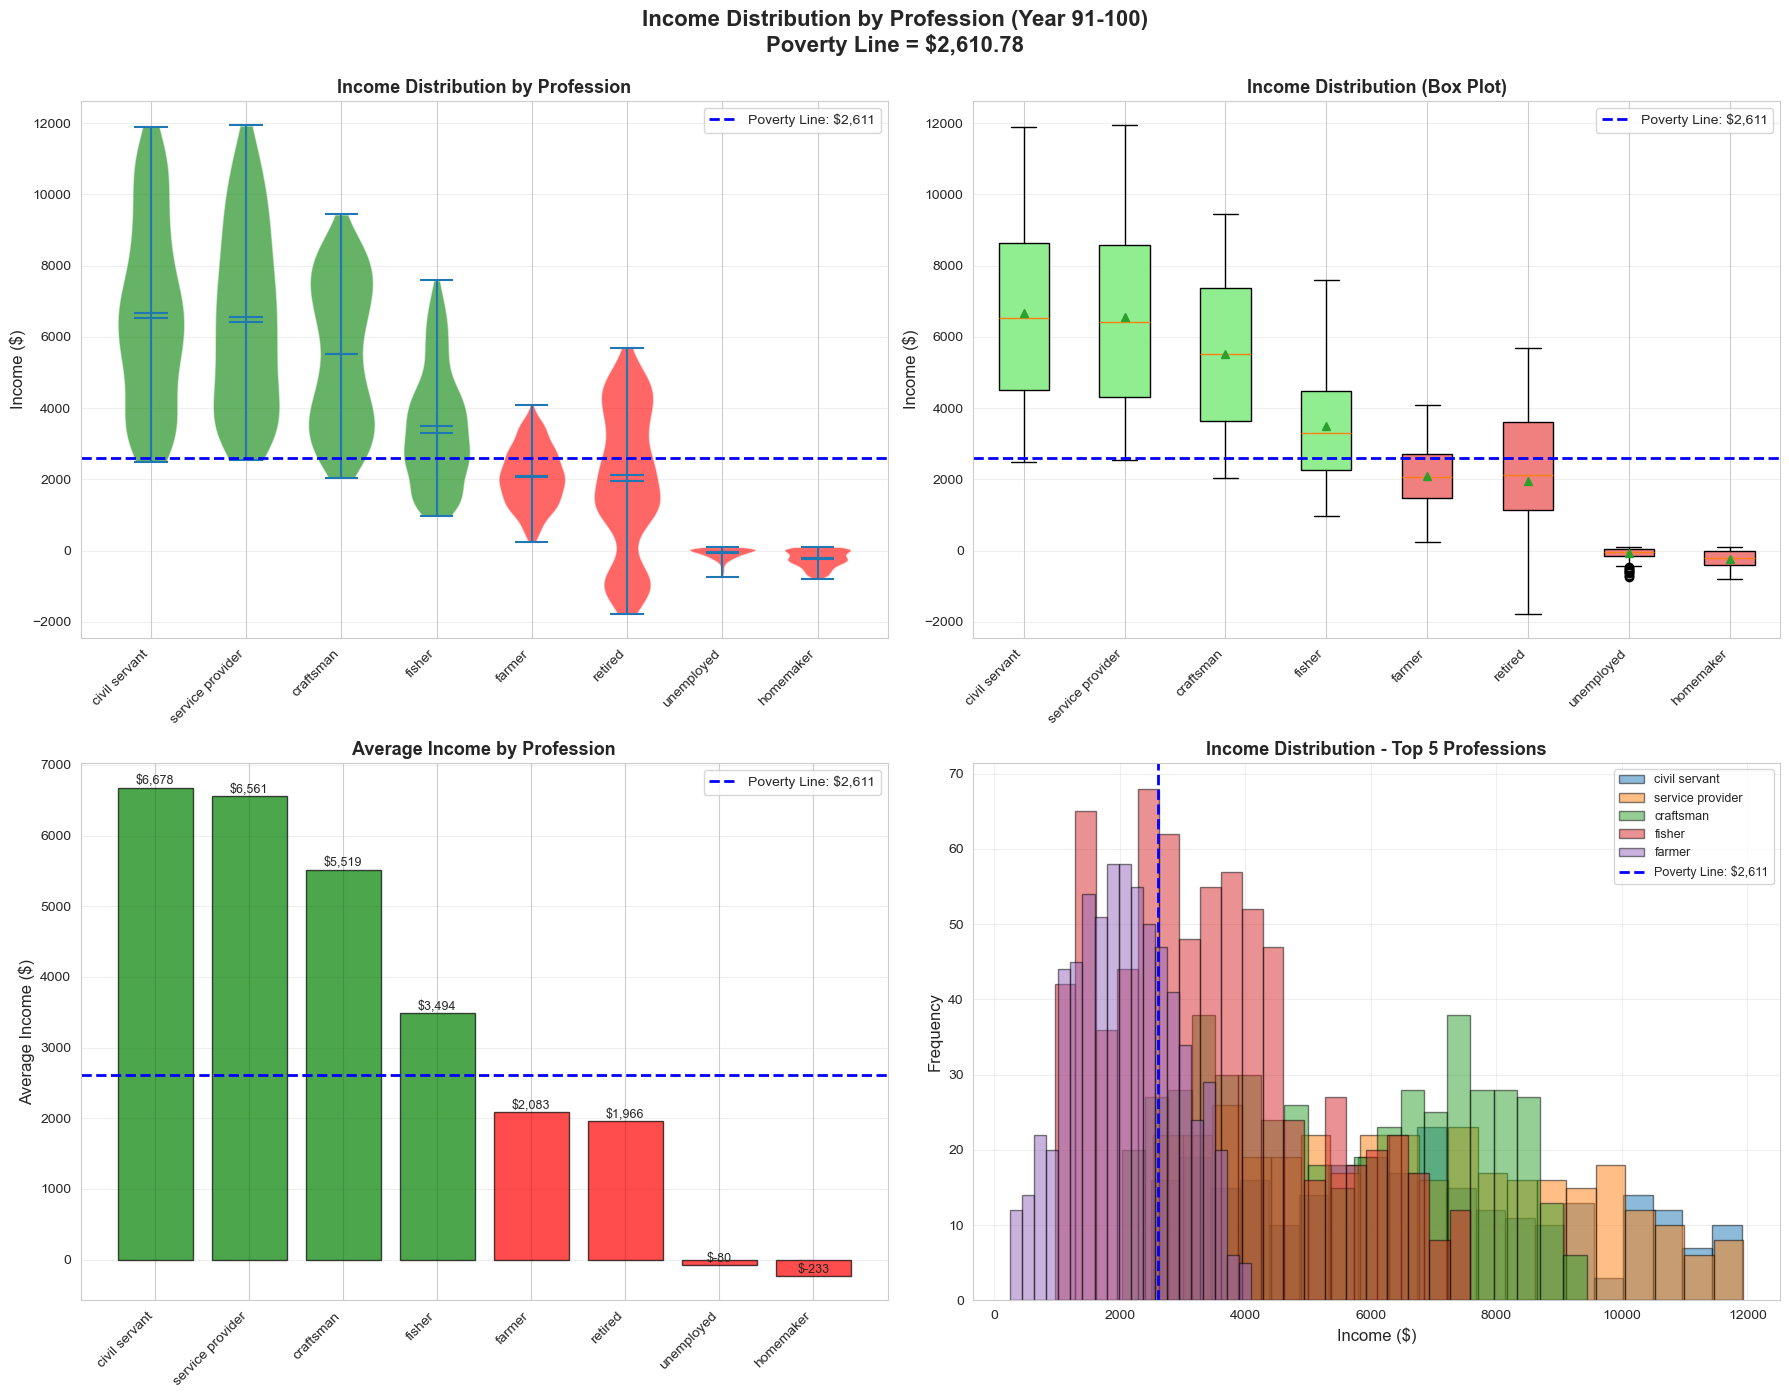


✅ Violin plots created successfully!


In [100]:
# Create violin plots for income distribution by profession
print("\n" + "="*80)
print("CREATING INCOME DISTRIBUTION VIOLIN PLOTS")
print("="*80)

# Filter professions with sufficient data (at least 50 records in last 10 years)
professions_to_plot = profession_last_10[profession_last_10['count'] >= 50]['profession'].tolist()
print(f"\nProfessions with 50+ workers: {', '.join(professions_to_plot)}")

# Prepare data for plotting
plot_data = last_10_working_all[last_10_working_all['profession'].isin(professions_to_plot)].copy()

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Income Distribution by Profession (Year 91-100)\nPoverty Line = ${:,.2f}'.format(poverty_line), 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 1: All professions violin plot
ax1 = axes[0, 0]
sorted_professions = profession_last_10.sort_values('avg_income', ascending=False)['profession'].tolist()
sorted_professions_filtered = [p for p in sorted_professions if p in professions_to_plot]

violin_parts = ax1.violinplot([plot_data[plot_data['profession'] == prof]['income'].values 
                                for prof in sorted_professions_filtered],
                               positions=range(len(sorted_professions_filtered)),
                               widths=0.7,
                               showmeans=True,
                               showmedians=True)

# Color violins by whether above or below poverty line
for i, (pc, prof) in enumerate(zip(violin_parts['bodies'], sorted_professions_filtered)):
    avg_income = profession_last_10[profession_last_10['profession'] == prof]['avg_income'].values[0]
    if avg_income > poverty_line:
        pc.set_facecolor('green')
        pc.set_alpha(0.6)
    else:
        pc.set_facecolor('red')
        pc.set_alpha(0.6)

ax1.axhline(y=poverty_line, color='blue', linestyle='--', linewidth=2, label=f'Poverty Line: ${poverty_line:,.0f}')
ax1.set_xticks(range(len(sorted_professions_filtered)))
ax1.set_xticklabels(sorted_professions_filtered, rotation=45, ha='right')
ax1.set_ylabel('Income ($)', fontsize=12)
ax1.set_title('Income Distribution by Profession', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Box plot comparison
ax2 = axes[0, 1]
bp = ax2.boxplot([plot_data[plot_data['profession'] == prof]['income'].values 
                   for prof in sorted_professions_filtered],
                  labels=sorted_professions_filtered,
                  patch_artist=True,
                  showmeans=True)

for i, (box, prof) in enumerate(zip(bp['boxes'], sorted_professions_filtered)):
    avg_income = profession_last_10[profession_last_10['profession'] == prof]['avg_income'].values[0]
    if avg_income > poverty_line:
        box.set_facecolor('lightgreen')
    else:
        box.set_facecolor('lightcoral')

ax2.axhline(y=poverty_line, color='blue', linestyle='--', linewidth=2, label=f'Poverty Line: ${poverty_line:,.0f}')
ax2.set_xticklabels(sorted_professions_filtered, rotation=45, ha='right')
ax2.set_ylabel('Income ($)', fontsize=12)
ax2.set_title('Income Distribution (Box Plot)', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Average income bar chart with poverty line
ax3 = axes[1, 0]
colors = ['green' if profession_last_10[profession_last_10['profession'] == prof]['avg_income'].values[0] > poverty_line 
          else 'red' for prof in sorted_professions_filtered]
bars = ax3.bar(range(len(sorted_professions_filtered)), 
               [profession_last_10[profession_last_10['profession'] == prof]['avg_income'].values[0] 
                for prof in sorted_professions_filtered],
               color=colors, alpha=0.7, edgecolor='black')
ax3.axhline(y=poverty_line, color='blue', linestyle='--', linewidth=2, label=f'Poverty Line: ${poverty_line:,.0f}')
ax3.set_xticks(range(len(sorted_professions_filtered)))
ax3.set_xticklabels(sorted_professions_filtered, rotation=45, ha='right')
ax3.set_ylabel('Average Income ($)', fontsize=12)
ax3.set_title('Average Income by Profession', fontsize=13, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, prof) in enumerate(zip(bars, sorted_professions_filtered)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=9)

# Plot 4: Income distribution histogram
ax4 = axes[1, 1]
for prof in sorted_professions_filtered[:5]:  # Top 5 professions
    prof_data = plot_data[plot_data['profession'] == prof]['income']
    ax4.hist(prof_data, alpha=0.5, bins=20, label=prof, edgecolor='black')

ax4.axvline(x=poverty_line, color='blue', linestyle='--', linewidth=2, label=f'Poverty Line: ${poverty_line:,.0f}')
ax4.set_xlabel('Income ($)', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Income Distribution - Top 5 Professions', fontsize=13, fontweight='bold')
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Violin plots created successfully!")

In [102]:
# Year 100 specific analysis - Homemaker and Unemployed count
print("="*80)
print("YEAR 100 - HOMEMAKER & UNEMPLOYED ANALYSIS")
print("="*80)

year_100_all = working_pop[working_pop['year'] == 100].copy()

homemaker_100 = year_100_all[year_100_all['profession'] == 'homemaker']
unemployed_100 = year_100_all[year_100_all['profession'] == 'unemployed']

print(f"\n📊 Year 100 Population by Profession:")
print(f"   Homemaker:  {len(homemaker_100)} people")
print(f"   Unemployed: {len(unemployed_100)} people")

print(f"\n💰 Homemaker Statistics (Year 100):")
print(f"   Average Income:    ${homemaker_100['income'].mean():>10,.2f}")
print(f"   Median Income:     ${homemaker_100['income'].median():>10,.2f}")
print(f"   Average Net Worth: ${homemaker_100['net_worth'].mean():>10,.2f}")
print(f"   Average Age:       {homemaker_100['age'].mean():>10.1f} years")
print(f"   Average Happiness: {homemaker_100['happiness'].mean():>10.2f}")
print(f"   Sex Distribution:  Male: {len(homemaker_100[homemaker_100['sex']=='M'])}, Female: {len(homemaker_100[homemaker_100['sex']=='F'])}")

print(f"\n💼 Unemployed Statistics (Year 100):")
print(f"   Average Income:    ${unemployed_100['income'].mean():>10,.2f}")
print(f"   Median Income:     ${unemployed_100['income'].median():>10,.2f}")
print(f"   Average Net Worth: ${unemployed_100['net_worth'].mean():>10,.2f}")
print(f"   Average Age:       {unemployed_100['age'].mean():>10.1f} years")
print(f"   Average Happiness: {unemployed_100['happiness'].mean():>10.2f}")
print(f"   Sex Distribution:  Male: {len(unemployed_100[unemployed_100['sex']=='M'])}, Female: {len(unemployed_100[unemployed_100['sex']=='F'])}")

print(f"\n📈 Comparison with Poverty Line (${poverty_line:,.2f}):")
print(f"   Homemaker avg income:  {((homemaker_100['income'].mean() - poverty_line) / poverty_line * 100):>6.1f}% {'below' if homemaker_100['income'].mean() < poverty_line else 'above'} poverty line")
print(f"   Unemployed avg income: {((unemployed_100['income'].mean() - poverty_line) / poverty_line * 100):>6.1f}% {'below' if unemployed_100['income'].mean() < poverty_line else 'above'} poverty line")

YEAR 100 - HOMEMAKER & UNEMPLOYED ANALYSIS

📊 Year 100 Population by Profession:
   Homemaker:  54 people
   Unemployed: 27 people

💰 Homemaker Statistics (Year 100):
   Average Income:    $   -227.54
   Median Income:     $   -208.27
   Average Net Worth: $ -8,778.18
   Average Age:             43.1 years
   Average Happiness:     100.00
   Sex Distribution:  Male: 23, Female: 29

💼 Unemployed Statistics (Year 100):
   Average Income:    $   -136.01
   Median Income:     $    -91.32
   Average Net Worth: $ -6,336.58
   Average Age:             40.6 years
   Average Happiness:      80.02
   Sex Distribution:  Male: 9, Female: 18

📈 Comparison with Poverty Line ($2,610.78):
   Homemaker avg income:  -108.7% below poverty line
   Unemployed avg income: -105.2% below poverty line
